In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

## Import data and summarize

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Member_no,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Member_no  38765 non-null  int64 
 1   Date       38765 non-null  object
 2   item       38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.describe()

,Member_no
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


### Missing values

In [6]:
df.isnull().sum() ## no missing value exists

Member_no    0
Date         0
item         0
dtype: int64

### Changing to necesary data type

In [7]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Member_no  38765 non-null  int64         
 1   Date       38765 non-null  datetime64[ns]
 2   item       38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [9]:
## I will visualize dates according to their month and their day_name so I can see which month more item was bought
def get_month(x):
    return x["Date"].month

df['Month'] = df.apply (lambda row: get_month(row), axis=1)

def get_day(x):
    return x["Date"].day_name()

df["Day"] = df.apply(lambda row:get_day(row),axis=1)

df.head()

,Member_no,Date,item,Month,Day
0,1808,2015-07-21,tropical fruit,7,Tuesday
1,2552,2015-01-05,whole milk,1,Monday
2,2300,2015-09-19,pip fruit,9,Saturday
3,1187,2015-12-12,other vegetables,12,Saturday
4,3037,2015-02-01,whole milk,2,Sunday


<AxesSubplot:xlabel='Month', ylabel='Count'>

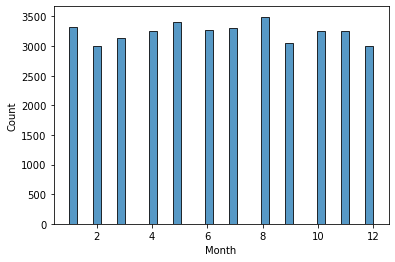

In [10]:
## histogram of months
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Month")

### Looks like our data uniformly distrubuted along months

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:516: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = self.ax.fill_between([], [], color=color, **plot_kws)


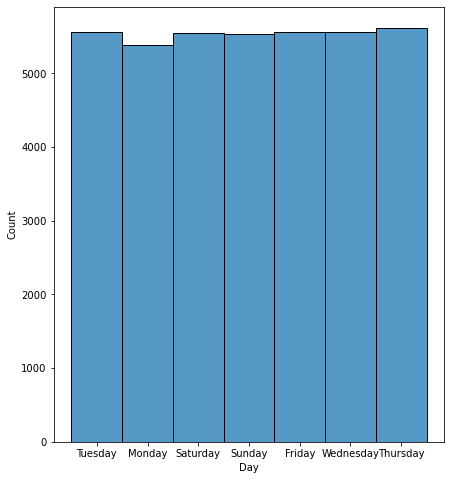

In [11]:
## histogram of months
plt.figure(figsize=(7,8));
sns.histplot(data=df,x="Day");

### Looks like our data is also uniformly distrbuted along days

In [12]:
df = df.drop(["Month","Day"],axis=1)
df.head()

,Member_no,Date,item
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [13]:
## number of unique items
n_unique = df["item"].nunique()
n_unique

167

### Top 10 most occuring items

In [14]:
df['item'].value_counts()[:10]

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: item, dtype: int64

<AxesSubplot:>

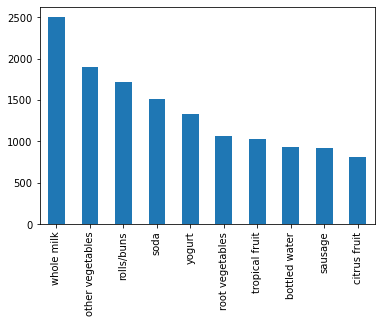

In [15]:
df['item'].value_counts()[:10].plot(kind='bar')

# Getting our data  readier to use with transaction encoder

### Preprocessing item names and  cleaning them

In [16]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['item'] = df['item'].str.replace(char, ' ',);

C:\Users\user\AppData\Local\Temp\ipykernel_14656\214292200.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item'] = df['item'].str.replace(char, ' ',);


### Grouping by member_no and date, concating item names

In [17]:
df = df.groupby(["Member_no","Date"],as_index=False).transform(lambda x: ','.join(x))
df.head()

,item
0,"tropical fruit,rolls buns,candy"
1,"whole milk,tropical fruit,chocolate"
2,"pip fruit,other vegetables,flour"
3,"other vegetables,onions,shopping bags"
4,"whole milk,other vegetables,white bread"


## Transition Encoder

In [18]:
df["item_arr"] = df["item"].apply(lambda x : x.split(","))

In [19]:
dataset = list(df["item_arr"])
dataset[:5]

[['tropical fruit', 'rolls buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour'],
 ['other vegetables', 'onions', 'shopping bags'],
 ['whole milk', 'other vegetables', 'white bread']]

In [20]:
tr = TransactionEncoder()
tr_arr = tr.fit_transform(dataset)
tr_df = pd.DataFrame(tr_arr, columns=tr.columns_)
tr_df.head()

,Instant food products,UHT milk,abrasive cleaner,artif sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [21]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Columns: 167 entries, Instant food products to zwieback
dtypes: bool(167)
memory usage: 6.2 MB


In [22]:
## Checking whether number of columns same with the number of unique items
len(tr_df.columns) == n_unique 

True

## Applying Apriori Algorithm

In [24]:
from mlxtend.frequent_patterns import apriori

freq = apriori(tr_df, min_support=0.01,use_colnames=True)
freq["length"] = freq["itemsets"].apply(lambda x : len(x))
freq.head()

,support,itemsets,length
0,0.024532,(UHT milk),1
1,0.039623,(beef),1
2,0.024739,(berries),1
3,0.019347,(beverages),1
4,0.054740,(bottled beer),1


In [25]:
freq.tail()

,support,itemsets,length
84,0.015246,"(sausage, whole milk)",2
85,0.010215,"(yogurt, sausage)",2
86,0.018522,"(soda, whole milk)",2
87,0.012924,"(tropical fruit, whole milk)",2
88,0.018677,"(yogurt, whole milk)",2


### Sort by support

In [30]:
freq_sorted = freq.sort_values(by="support",ascending=False)
print("Top 5 highest support \n")
freq_sorted.head()

Top 5 highest support 



,support,itemsets,length
67,0.183748,(whole milk),1
43,0.137676,(other vegetables),1
50,0.127950,(rolls buns),1
57,0.112266,(soda),1
68,0.101432,(yogurt),1


### we can clearly see that these items are frequently bought

In [31]:
freq_sorted = freq[freq["length"]>1].sort_values(by="support",ascending=False)
print("Top 5 highest support more than 1 item \n")
freq_sorted.head()

Top 5 highest support more than 1 item 



,support,itemsets,length
75,0.022340,"(other vegetables, whole milk)",2
80,0.022237,"(rolls buns, whole milk)",2
88,0.018677,"(yogurt, whole milk)",2
86,0.018522,"(soda, whole milk)",2
72,0.016097,"(other vegetables, rolls buns)",2


### In here we can see what items are bought together mostly

## Applying FP-Growth Algorithm

In [32]:
from mlxtend.frequent_patterns import fpgrowth

fp_freq = fpgrowth(tr_df, min_support=0.01,use_colnames=True)

In [33]:
fp_freq.head()

,support,itemsets
0,0.127950,(rolls buns)
1,0.079324,(tropical fruit)
2,0.016613,(candy)
3,0.183748,(whole milk)
4,0.028092,(chocolate)



### Lets compare the speeds ( it takes time run these commands )

In [71]:
from mlxtend.frequent_patterns import apriori

%timeit -n 50 -r 5 apriori(tr_df, min_support=0.01)

772 ms ± 33.9 ms per loop (mean ± std. dev. of 5 runs, 50 loops each)


In [72]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 50 -r 5 fpgrowth(tr_df, min_support=0.01)

334 ms ± 9.06 ms per loop (mean ± std. dev. of 5 runs, 50 loops each)


## It seems that fp growth is almost 2 times faster than apriori algorithm
## In Apriori a generate candidate is required to get frequent itemsets. However FP-Growth generate candidate algorithm is not done because FP-Growth uses the concept of tree development in search of the frequent itemsets. This is what causes the FP-Growth algorithm is faster than the Apriori algorithm [

## the disadvantages of the Apriori algorithm when working with large datasets is that the Apriori algorithm is slow, inefficient, and uses a lot of resources as it has to scan the database many times,

## But the fp-growth algorithm needs to scan the database only twice when compared to Apriori which scans the transactions for each iteration.